In [1]:
for i in range(75,101):
    print('Image-'+str(i)+'_2021-02-09.jpg',end=',')

Image-75_2021-02-09.jpg,Image-76_2021-02-09.jpg,Image-77_2021-02-09.jpg,Image-78_2021-02-09.jpg,Image-79_2021-02-09.jpg,Image-80_2021-02-09.jpg,Image-81_2021-02-09.jpg,Image-82_2021-02-09.jpg,Image-83_2021-02-09.jpg,Image-84_2021-02-09.jpg,Image-85_2021-02-09.jpg,Image-86_2021-02-09.jpg,Image-87_2021-02-09.jpg,Image-88_2021-02-09.jpg,Image-89_2021-02-09.jpg,Image-90_2021-02-09.jpg,Image-91_2021-02-09.jpg,Image-92_2021-02-09.jpg,Image-93_2021-02-09.jpg,Image-94_2021-02-09.jpg,Image-95_2021-02-09.jpg,Image-96_2021-02-09.jpg,Image-97_2021-02-09.jpg,Image-98_2021-02-09.jpg,Image-99_2021-02-09.jpg,Image-100_2021-02-09.jpg,

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

def empty(a):
    pass
plot_pp=[]
plot_ag=[]
agg=[]
pp=[]
area_pp=[]
area_ag=[]
conv_pp=[]
conv_ag=[]
cir_pp=[]
cir_ag=[]
conc_pp=[]
conc_ag=[]
r_mean_ag=[]
r_mean_pp=[]
def getContours(img,imgContours,actual_area,image_area):
    
    contours, hierarchy = cv2.findContours(imgDil, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    ag=0
    ppt=0
    for i in range(len(contours)):
        area=cv2.contourArea(contours[i])
        if area>200:
            hull=cv2.convexHull(contours[i])
            area1=cv2.contourArea(hull)
            if(area/area1<=1 and area/area1>=0.9):
                ppt+=1
                cv2.drawContours(imgContours, contours,i, (255,0,0), 3)
                peri=cv2.arcLength(contours[i],True)
                approx=cv2.approxPolyDP(contours[i],0.02*peri,True)
                x,y,w,h=cv2.boundingRect(approx)
                
                M = cv2.moments(contours[i])
                cx = int(M['m10']/M['m00'])
                cy = int(M['m01']/M['m00'])
                dist=[]
                for j in range(len(contours[i])):
                    dist.append(((cx-contours[i][j][0][0])**2+(cy-contours[i][j][0][1])**2)**0.5)
                r_mean=sum(dist)/len(dist)
                mean_area=3.142*r_mean*r_mean
                cv2.putText(imgContours,str(ppt),(x+w+10,y+h+10),cv2.FONT_HERSHEY_COMPLEX,0.7,(255,0,0),2)
                pp.append('Pure Particle - '+str(ppt)+' : Area = '+str(area*actual_area/image_area)+'mm^2')
                pp.append('Pure Particle - '+str(ppt)+' : Convexity = '+str(area/area1))
                pp.append('Pure Particle - '+str(ppt)+' : Max Concavity = '+str(1-area/area1))
                pp.append('Pure Particle - '+str(ppt)+' : Circularity = '+str(area/mean_area))
                conv_pp.append(area/area1)
                cir_pp.append(area/mean_area)
                conc_pp.append(1-area/area1)
                r_mean_pp.append(2*r_mean)
                area_pp.append(area*actual_area/image_area)
                plot_pp.append(area*actual_area/image_area)
#                 cv2.rectangle(imgContours,(x,y),(x+w,h+y),(0,255,0),5)
                
            elif(area/area1>0.4 and area/area1<0.9):
                ag+=1
                cv2.drawContours(imgContours, contours,i, (0,0,255), 3)
                peri=cv2.arcLength(contours[i],True)
                approx=cv2.approxPolyDP(contours[i],0.02*peri,True)
                x,y,w,h=cv2.boundingRect(approx)   
                M = cv2.moments(contours[i])
                cx = int(M['m10']/M['m00'])
                cy = int(M['m01']/M['m00'])
                dist=[]
                for j in range(len(contours[i])):
                    dist.append(((cx-contours[i][j][0][0])**2+(cy-contours[i][j][0][1])**2)**0.5)
                r_mean=sum(dist)/len(dist)
                mean_area=3.142*r_mean*r_mean
                agg.append('Agglomerate - '+str(ag)+' : Area = '+str(area*actual_area/image_area)+'m^2')
                agg.append('Agglomerate - '+str(ag)+' : Convexity = '+str(area/area1))
                agg.append('Agglomerate - '+str(ag)+' : Max Concavity = '+str(1-area/area1))
                agg.append('Agglomerate - '+str(ag)+' : Circularity = '+str(area/mean_area))
                conv_ag.append(area/area1)
                cir_ag.append(area/mean_area)
                conc_ag.append(1-area/area1)
                area_ag.append(area*actual_area/image_area)
                plot_ag.append(area*actual_area/image_area)
                r_mean_ag.append(2*r_mean)
                cv2.putText(imgContours,str(ag),(x+w+10,y+h+10),cv2.FONT_HERSHEY_COMPLEX,0.7,(0,0,255),2)
    cv2.putText(imgContours,"No of Agglomerates"+' '+str(ag),(20,20),cv2.FONT_HERSHEY_COMPLEX,0.7,(0,0,255),2)
    cv2.putText(imgContours,"No of Pure Particles"+' '+str(ppt),(20,60),cv2.FONT_HERSHEY_COMPLEX,0.7,(255,0,0),2)

ds = ['Image-75_2021-02-09.jpg','Image-76_2021-02-09.jpg','Image-77_2021-02-09.jpg','Image-78_2021-02-09.jpg','Image-79_2021-02-09.jpg',
      'Image-80_2021-02-09.jpg','Image-81_2021-02-09.jpg','Image-82_2021-02-09.jpg','Image-83_2021-02-09.jpg','Image-84_2021-02-09.jpg',
      'Image-85_2021-02-09.jpg','Image-86_2021-02-09.jpg','Image-87_2021-02-09.jpg','Image-88_2021-02-09.jpg','Image-89_2021-02-09.jpg',
      'Image-90_2021-02-09.jpg','Image-91_2021-02-09.jpg','Image-92_2021-02-09.jpg','Image-93_2021-02-09.jpg','Image-94_2021-02-09.jpg',
      'Image-95_2021-02-09.jpg','Image-96_2021-02-09.jpg','Image-97_2021-02-09.jpg','Image-98_2021-02-09.jpg','Image-99_2021-02-09.jpg',
      'Image-100_2021-02-09.jpg']
for _ in range(len(ds)):
    actual_area=0.85*0.64
    image = cv2.imread(ds[_])
    width = int(640)
    height = int(480)
    image_area=width*height
    dim = (width, height)
    image = cv2.resize(image,(640,480),None,1,1)
    imgContours=image.copy()
    imgBlur = cv2.GaussianBlur(image, (7,7), 1)
    imgGray=cv2.cvtColor(imgBlur,cv2.COLOR_BGR2GRAY)
    imgCanny=cv2.Canny(imgGray,59,24)
    kernel=np.ones((5,5))
    imgDil=cv2.dilate(imgCanny,kernel,iterations=1)
    getContours(imgDil,imgContours,actual_area,image_area)
    print('Image '+str(ds[_]))
    for i in pp:
        print(i)
        pp=[]
    print()
    for j in agg:
        print(j)
        agg=[]
    print()
    cv2.imshow('Image'+str(_+1), imgContours)
    cv2.waitKey(0) 
    cv2.destroyAllWindows() 

Image Image-75_2021-02-09.jpg
Pure Particle - 1 : Area = 0.00040109375000000003mm^2
Pure Particle - 1 : Convexity = 0.9301848049281314
Pure Particle - 1 : Max Concavity = 0.06981519507186862
Pure Particle - 1 : Circularity = 0.9666107677198332
Pure Particle - 2 : Area = 0.00041171875000000003mm^2
Pure Particle - 2 : Convexity = 0.9627329192546584
Pure Particle - 2 : Max Concavity = 0.037267080745341574
Pure Particle - 2 : Circularity = 0.9492166915562279
Pure Particle - 3 : Area = 0.0004347395833333334mm^2
Pure Particle - 3 : Convexity = 0.9406130268199234
Pure Particle - 3 : Max Concavity = 0.059386973180076574
Pure Particle - 3 : Circularity = 0.9574576171301854
Pure Particle - 4 : Area = 0.0013723958333333333mm^2
Pure Particle - 4 : Convexity = 0.9074941451990632
Pure Particle - 4 : Max Concavity = 0.09250585480093676
Pure Particle - 4 : Circularity = 0.981130940339089
Pure Particle - 5 : Area = 0.0003993229166666667mm^2
Pure Particle - 5 : Convexity = 0.9534883720930233
Pure Partic

Image Image-78_2021-02-09.jpg
Pure Particle - 1 : Area = 0.0011351041666666666mm^2
Pure Particle - 1 : Convexity = 0.9040902679830748
Pure Particle - 1 : Max Concavity = 0.09590973201692521
Pure Particle - 1 : Circularity = 0.9487533094402851
Pure Particle - 2 : Area = 0.0007145312500000001mm^2
Pure Particle - 2 : Convexity = 0.9793689320388349
Pure Particle - 2 : Max Concavity = 0.020631067961165095
Pure Particle - 2 : Circularity = 0.9567398687393222
Pure Particle - 3 : Area = 0.0003647916666666667mm^2
Pure Particle - 3 : Convexity = 0.9015317286652079
Pure Particle - 3 : Max Concavity = 0.09846827133479208
Pure Particle - 3 : Circularity = 0.9189187697488131
Pure Particle - 4 : Area = 0.0010828645833333332mm^2
Pure Particle - 4 : Convexity = 0.9465944272445821
Pure Particle - 4 : Max Concavity = 0.05340557275541791
Pure Particle - 4 : Circularity = 0.9859503270040868

Agglomerate - 1 : Area = 0.0006888541666666667m^2
Agglomerate - 1 : Convexity = 0.854006586169045
Agglomerate - 1 : 

Image Image-81_2021-02-09.jpg
Pure Particle - 1 : Area = 0.0004152604166666667mm^2
Pure Particle - 1 : Convexity = 0.955193482688391
Pure Particle - 1 : Max Concavity = 0.044806517311609007
Pure Particle - 1 : Circularity = 0.9083700885279284
Pure Particle - 2 : Area = 0.0008349479166666668mm^2
Pure Particle - 2 : Convexity = 0.9822916666666667
Pure Particle - 2 : Max Concavity = 0.017708333333333326
Pure Particle - 2 : Circularity = 0.9798983353789616
Pure Particle - 3 : Area = 0.0010722395833333332mm^2
Pure Particle - 3 : Convexity = 0.9322555812163202
Pure Particle - 3 : Max Concavity = 0.06774441878367976
Pure Particle - 3 : Circularity = 0.9595500983060731

Agglomerate - 1 : Area = 0.00177703125m^2
Agglomerate - 1 : Convexity = 0.8314001657000829
Agglomerate - 1 : Max Concavity = 0.1685998342999171
Agglomerate - 1 : Circularity = 0.9780388349661847
Agglomerate - 2 : Area = 0.0015919791666666669m^2
Agglomerate - 2 : Convexity = 0.770681525932276
Agglomerate - 2 : Max Concavity = 0.

Image Image-84_2021-02-09.jpg
Pure Particle - 1 : Area = 0.0005436458333333334mm^2
Pure Particle - 1 : Convexity = 0.9504643962848297
Pure Particle - 1 : Max Concavity = 0.049535603715170295
Pure Particle - 1 : Circularity = 0.9243311173620624
Pure Particle - 2 : Area = 0.0009465104166666668mm^2
Pure Particle - 2 : Convexity = 0.9005897219882055
Pure Particle - 2 : Max Concavity = 0.09941027801179447
Pure Particle - 2 : Circularity = 0.9160684126943532
Pure Particle - 3 : Area = 0.0008296354166666667mm^2
Pure Particle - 3 : Convexity = 0.964984552008239
Pure Particle - 3 : Max Concavity = 0.03501544799176104
Pure Particle - 3 : Circularity = 0.9961935301049607
Pure Particle - 4 : Area = 0.00073046875mm^2
Pure Particle - 4 : Convexity = 0.9774881516587678
Pure Particle - 4 : Max Concavity = 0.02251184834123221
Pure Particle - 4 : Circularity = 0.9603359857881877

Agglomerate - 1 : Area = 0.00321671875m^2
Agglomerate - 1 : Convexity = 0.6916047972587093
Agglomerate - 1 : Max Concavity = 

Image Image-87_2021-02-09.jpg
Pure Particle - 1 : Area = 0.0005259375mm^2
Pure Particle - 1 : Convexity = 0.9705882352941176
Pure Particle - 1 : Max Concavity = 0.02941176470588236
Pure Particle - 1 : Circularity = 0.9838143530972625
Pure Particle - 2 : Area = 0.00040552083333333336mm^2
Pure Particle - 2 : Convexity = 0.9404517453798767
Pure Particle - 2 : Max Concavity = 0.05954825462012325
Pure Particle - 2 : Circularity = 0.9762080183165134
Pure Particle - 3 : Area = 0.0008668229166666667mm^2
Pure Particle - 3 : Convexity = 0.9039704524469068
Pure Particle - 3 : Max Concavity = 0.09602954755309323
Pure Particle - 3 : Circularity = 0.9825721290243805

Agglomerate - 1 : Area = 0.0011758333333333334m^2
Agglomerate - 1 : Convexity = 0.8657105606258149
Agglomerate - 1 : Max Concavity = 0.13428943937418514
Agglomerate - 1 : Circularity = 0.9112175443446304
Agglomerate - 2 : Area = 0.0014618229166666668m^2
Agglomerate - 2 : Convexity = 0.8065461651196874
Agglomerate - 2 : Max Concavity = 0

Image Image-90_2021-02-09.jpg
Pure Particle - 1 : Area = 0.0012661458333333335mm^2
Pure Particle - 1 : Convexity = 0.9219858156028369
Pure Particle - 1 : Max Concavity = 0.07801418439716312
Pure Particle - 1 : Circularity = 0.9320227193795337
Pure Particle - 2 : Area = 0.0003568229166666667mm^2
Pure Particle - 2 : Convexity = 0.9200913242009132
Pure Particle - 2 : Max Concavity = 0.07990867579908678
Pure Particle - 2 : Circularity = 0.8571446642073485
Pure Particle - 3 : Area = 0.0005569270833333334mm^2
Pure Particle - 3 : Convexity = 0.9089595375722543
Pure Particle - 3 : Max Concavity = 0.09104046242774566
Pure Particle - 3 : Circularity = 0.8682375661214583
Pure Particle - 4 : Area = 0.0006392708333333334mm^2
Pure Particle - 4 : Convexity = 0.9562913907284768
Pure Particle - 4 : Max Concavity = 0.0437086092715232
Pure Particle - 4 : Circularity = 0.8357895930123026
Pure Particle - 5 : Area = 0.00039843750000000003mm^2
Pure Particle - 5 : Convexity = 0.9054325955734407
Pure Particle 

Image Image-94_2021-02-09.jpg
Pure Particle - 1 : Area = 0.0010881770833333334mm^2
Pure Particle - 1 : Convexity = 0.9090236686390533
Pure Particle - 1 : Max Concavity = 0.09097633136094674
Pure Particle - 1 : Circularity = 0.9734885923312457
Pure Particle - 2 : Area = 0.0005144270833333333mm^2
Pure Particle - 2 : Convexity = 0.9416531604538088
Pure Particle - 2 : Max Concavity = 0.05834683954619124
Pure Particle - 2 : Circularity = 0.9695232876707565

Agglomerate - 1 : Area = 0.00036125m^2
Agglomerate - 1 : Convexity = 0.8908296943231441
Agglomerate - 1 : Max Concavity = 0.10917030567685593
Agglomerate - 1 : Circularity = 0.941622168852891
Agglomerate - 2 : Area = 0.0005241666666666667m^2
Agglomerate - 2 : Convexity = 0.8956127080181543
Agglomerate - 2 : Max Concavity = 0.10438729198184571
Agglomerate - 2 : Circularity = 0.8712348514203331
Agglomerate - 3 : Area = 0.0005790625m^2
Agglomerate - 3 : Convexity = 0.6979722518676628
Agglomerate - 3 : Max Concavity = 0.30202774813233724
Agg

Image Image-98_2021-02-09.jpg
Pure Particle - 1 : Area = 0.0008110416666666667mm^2
Pure Particle - 1 : Convexity = 0.9662447257383966
Pure Particle - 1 : Max Concavity = 0.03375527426160341
Pure Particle - 1 : Circularity = 0.9850051713908656
Pure Particle - 2 : Area = 0.0021790104166666668mm^2
Pure Particle - 2 : Convexity = 0.9108068097705403
Pure Particle - 2 : Max Concavity = 0.0891931902294597
Pure Particle - 2 : Circularity = 0.9468000626358637

Agglomerate - 1 : Area = 0.0004373958333333334m^2
Agglomerate - 1 : Convexity = 0.8591304347826086
Agglomerate - 1 : Max Concavity = 0.14086956521739136
Agglomerate - 1 : Circularity = 0.9108767650760566
Agglomerate - 2 : Area = 0.0016973437500000003m^2
Agglomerate - 2 : Convexity = 0.7155655095184771
Agglomerate - 2 : Max Concavity = 0.2844344904815229
Agglomerate - 2 : Circularity = 0.6601654406158726
Agglomerate - 3 : Area = 0.0027731250000000004m^2
Agglomerate - 3 : Convexity = 0.8097207859358841
Agglomerate - 3 : Max Concavity = 0.19

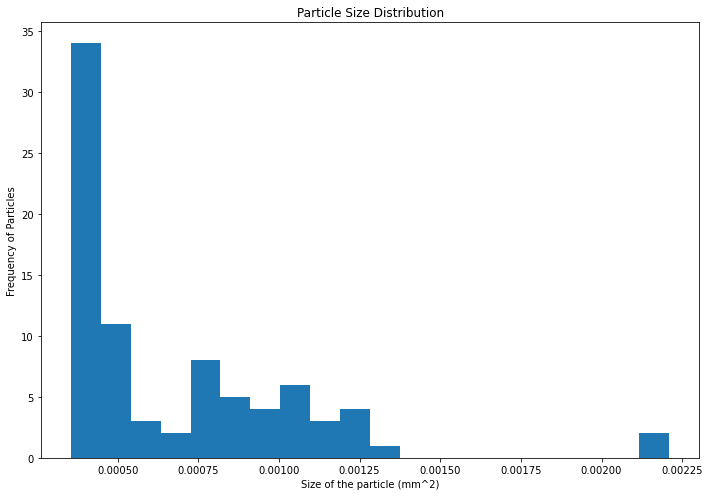

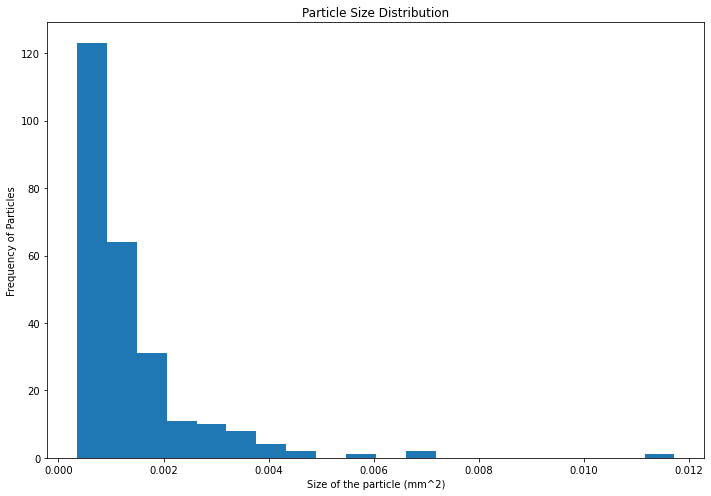

In [3]:
fig, axs = plt.subplots(1, 1, 
                    figsize =(10, 7),  
                    tight_layout = True) 
  
axs.hist(plot_pp, bins = 20) 

plt.xlabel('Size of the particle (mm^2)')
plt.ylabel('Frequency of Particles')
plt.title('Particle Size Distribution');

fig, axs = plt.subplots(1, 1, 
                    figsize =(10, 7),  
                    tight_layout = True) 
  
axs.hist(plot_ag, bins = 20)
plt.xlabel('Size of the particle (mm^2)')
plt.ylabel('Frequency of Particles')
plt.title('Particle Size Distribution');

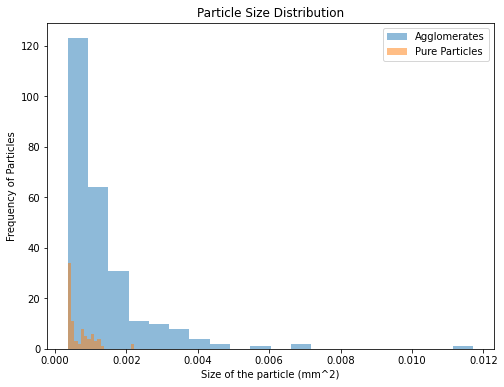

In [4]:
plt.figure(figsize=(8,6))
plt.hist(plot_ag, bins=20, alpha=0.5, label="Agglomerates")
plt.hist(plot_pp, bins=20, alpha=0.5, label="Pure Particles")
plt.xlabel('Size of the particle (mm^2)')
plt.ylabel('Frequency of Particles')
plt.title('Particle Size Distribution')
plt.legend();

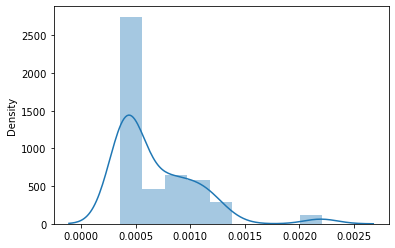

In [5]:
import seaborn as sns
ax=sns.distplot(plot_pp)

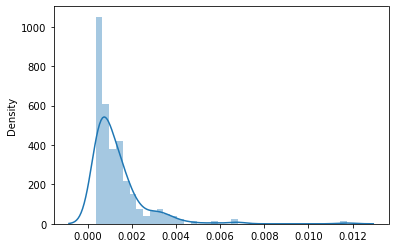

In [6]:
ay=sns.distplot(plot_ag)

# Index 1

In [7]:
Number_of_Agglomerates = len(plot_ag)
print("Number_of_Agglomerates = "+str(Number_of_Agglomerates))

Number_of_Agglomerates = 257


# Index 5

In [8]:
Aggregated_symmetry_index = max(r_mean_ag)/min(r_mean_ag)
print("Aggregated_symmetry_index = "+str(Aggregated_symmetry_index))

Aggregated_symmetry_index = 6.120297603366653


# Index 2

In [9]:
avg_max_width_ag = sum(r_mean_ag)/(len(r_mean_ag))
avg_max_width_pp = sum(r_mean_pp)/(len(r_mean_pp))
Aggregated_diameter_index = avg_max_width_ag/avg_max_width_pp
print("Aggregated diameter index = "+str(Aggregated_diameter_index))

Aggregated diameter index = 1.3882892035727845


# Index 3

In [10]:
avg_area_ag=sum(area_ag)/len(area_ag)
avg_area_pp=sum(area_pp)/len(area_pp)
Aggregated_area_index=avg_area_ag/avg_area_pp
print("Aggregated_area_index = "+str(Aggregated_area_index))

Aggregated_area_index = 1.9292112206848395


# Index 4

In [11]:
Aggregated_mass_index=Aggregated_area_index*Number_of_Agglomerates
print("Aggregated mass index = "+str(Aggregated_mass_index))

Aggregated mass index = 495.8072837160038
